### Simulação do Cenário 2 - Opção 2 - Proposta

In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados
Topologia configurada com sucesso para slices!


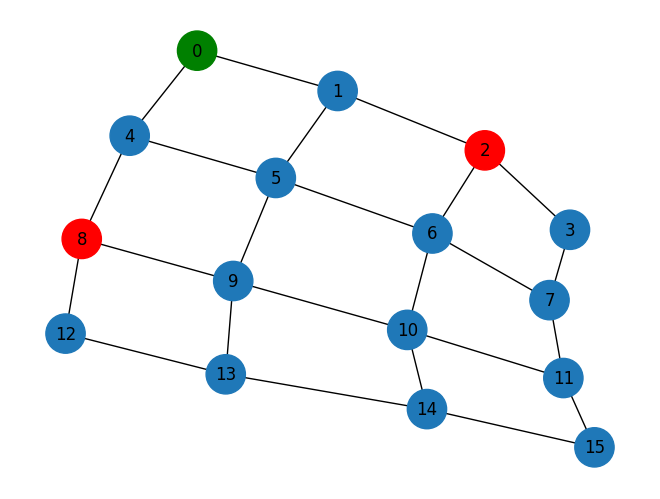

Final Slice 1 Paths: [[8, 4, 0]]
Final Slice 2 Paths: [[2, 6, 5, 4, 0]]


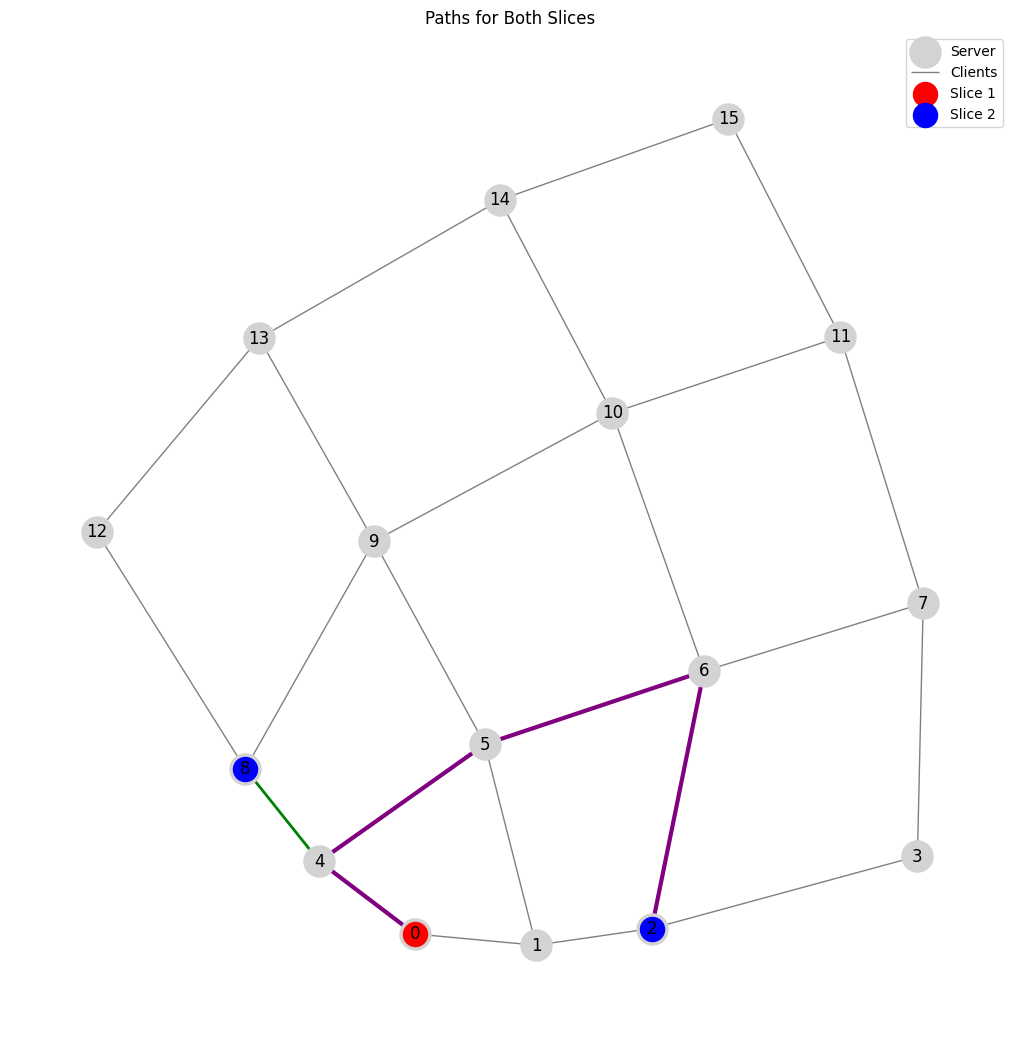

In [2]:
rede = Network()
controlador = Controller(rede)

# Configura uma grade 4x4
clients = [8, 2]
server = 0
rede.set_topology_for_slices(graph_type='grade', dimensions=(4, 4), clients=clients, server=server)


rede.draw()

# Executa a simulação de slices
rede.run_slice_simulation(clients=clients, server=server)
Logger.activate(Logger)



### Nessa parte, eu posso gerar minha requesições, com os protocolos: Childs(AC_BQC) e BFK_BQC.

##### O cenário 2 apresenta o agendamento das requesições de forma que pode-se executar uma requesição de cada protocolo, então a cada timeslot pode-se executar até duas requesições.  

In [3]:
slice_1_paths = rede.final_slice_1_paths  
slice_2_paths = rede.final_slice_2_paths  

controlador.initialize_slices(network=rede, clients=[14,2], server=0, protocols=["BFK_BQC", "AC_BQC"], slice_1_paths=slice_1_paths, slice_2_paths=slice_2_paths)

for _ in range(10):
    protocol = random.choice(["BFK_BQC", "AC_BQC"])  
    if protocol == "BFK_BQC":
        alice_id = 8
        slice_path = rede.final_slice_1_paths[0]  
    elif protocol == "AC_BQC":
        alice_id = 2
        slice_path = rede.final_slice_2_paths[0]  
    bob_id = 0
    num_qubits = 10
    num_gates = 5

    # Passa o slice_path para garantir a rota correta na requisição
    rede.generate_request_slice(alice_id, bob_id, num_qubits, num_gates, protocol=protocol, slice_path=slice_path,scenario=2)

scheduled_timeslots = rede.send_requests_to_controller(controlador)
slice_paths = controlador.slices  
rede.execute_scheduled_requests(scheduled_timeslots)


2025-01-02 01:39:48,542: Slice slice_1 configurado para protocolo BFK_BQC com rotas: {'client': [8, 4, 0]}
2025-01-02 01:39:48,544: Slice slice_2 configurado para protocolo AC_BQC com rotas: {'client': [2, 6, 5, 4, 0]}
2025-01-02 01:39:48,725: Circuito aleatório gerado com 10 qubits e 5 portas. Instruções sobre o circuito.
2025-01-02 01:39:48,726: Instrução: {'operation': 'cx', 'qubits': [4, 3]}
2025-01-02 01:39:48,726: Instrução: {'operation': 'cz', 'qubits': [8, 0]}
2025-01-02 01:39:48,728: Instrução: {'operation': 'swap', 'qubits': [0, 6]}
2025-01-02 01:39:48,728: Instrução: {'operation': 'swap', 'qubits': [3, 1]}
2025-01-02 01:39:48,729: Instrução: {'operation': 't', 'qubits': [7]}
2025-01-02 01:39:48,730: Requisição adicionada: Alice 8 -> Bob 0 com protocolo BFK_BQC e cenário 2.


                   
q_0: ──────■──X────
           │  │    
q_1: ──────┼──┼──X─
           │  │  │ 
q_2: ──────┼──┼──┼─
     ┌───┐ │  │  │ 
q_3: ┤ X ├─┼──┼──X─
     └─┬─┘ │  │    
q_4: ──■───┼──┼────
           │  │    
q_5: ──────┼──┼────
           │  │    
q_6: ──────┼──X────
     ┌───┐ │       
q_7: ┤ T ├─┼───────
     └───┘ │       
q_8: ──────■───────
                   
q_9: ──────────────
                   
                  
q_0: ──────■──────
           │      
q_1: ──────┼──────
           │      
q_2: ──────┼──────
     ┌───┐ │      
q_3: ┤ T ├─┼──────
     └───┘ │      
q_4: ──────┼──────
           │      
q_5: ──────┼──────
           │      
q_6: ──■───┼──────
     ┌─┴─┐ │      
q_7: ┤ X ├─┼──────
     └───┘ │ ┌───┐
q_8: ──────■─┤ X ├
     ┌───┐   └───┘
q_9: ┤ H ├────────
     └───┘        


2025-01-02 01:39:49,342: Circuito aleatório gerado com 10 qubits e 5 portas. Instruções sobre o circuito.
2025-01-02 01:39:49,344: Instrução: {'operation': 'h', 'qubits': [9]}
2025-01-02 01:39:49,345: Instrução: {'operation': 't', 'qubits': [3]}
2025-01-02 01:39:49,347: Instrução: {'operation': 'cz', 'qubits': [0, 8]}
2025-01-02 01:39:49,349: Instrução: {'operation': 'cx', 'qubits': [6, 7]}
2025-01-02 01:39:49,351: Instrução: {'operation': 'x', 'qubits': [8]}
2025-01-02 01:39:49,354: Requisição adicionada: Alice 2 -> Bob 0 com protocolo AC_BQC e cenário 2.
2025-01-02 01:39:49,442: Circuito aleatório gerado com 10 qubits e 5 portas. Instruções sobre o circuito.
2025-01-02 01:39:49,443: Instrução: {'operation': 'h', 'qubits': [0]}
2025-01-02 01:39:49,446: Instrução: {'operation': 'z', 'qubits': [3]}
2025-01-02 01:39:49,447: Instrução: {'operation': 's', 'qubits': [0]}
2025-01-02 01:39:49,448: Instrução: {'operation': 'swap', 'qubits': [7, 6]}
2025-01-02 01:39:49,448: Instrução: {'operati

     ┌───┐┌───┐   
q_0: ┤ H ├┤ S ├─■─
     └───┘└───┘ │ 
q_1: ───────────┼─
                │ 
q_2: ───────────┼─
     ┌───┐      │ 
q_3: ┤ Z ├──────■─
     └───┘        
q_4: ─────────────
                  
q_5: ─────────────
                  
q_6: ──X──────────
       │          
q_7: ──X──────────
                  
q_8: ─────────────
                  
q_9: ─────────────
                  
                
q_0: ─────────X─
              │ 
q_1: ──────■──┼─
           │  │ 
q_2: ──────┼──┼─
           │  │ 
q_3: ──────┼──┼─
           │  │ 
q_4: ──────┼──┼─
     ┌───┐ │  │ 
q_5: ┤ Y ├─┼──┼─
     └───┘ │  │ 
q_6: ──────┼──┼─
     ┌───┐ │  │ 
q_7: ┤ X ├─┼──X─
     └───┘ │    
q_8: ──────■────
     ┌───┐      
q_9: ┤ Z ├──────
     └───┘      


2025-01-02 01:39:49,549: Circuito aleatório gerado com 10 qubits e 5 portas. Instruções sobre o circuito.
2025-01-02 01:39:49,550: Instrução: {'operation': 'x', 'qubits': [7]}
2025-01-02 01:39:49,551: Instrução: {'operation': 'z', 'qubits': [9]}
2025-01-02 01:39:49,552: Instrução: {'operation': 'y', 'qubits': [5]}
2025-01-02 01:39:49,554: Instrução: {'operation': 'cz', 'qubits': [1, 8]}
2025-01-02 01:39:49,556: Instrução: {'operation': 'swap', 'qubits': [7, 0]}
2025-01-02 01:39:49,557: Requisição adicionada: Alice 8 -> Bob 0 com protocolo BFK_BQC e cenário 2.


     ┌───┐   
q_0: ┤ T ├───
     └───┘   
q_1: ──────■─
           │ 
q_2: ──────┼─
           │ 
q_3: ──────┼─
     ┌───┐ │ 
q_4: ┤ X ├─┼─
     ├───┤ │ 
q_5: ┤ X ├─┼─
     └───┘ │ 
q_6: ──■───■─
       │     
q_7: ──■─────
             
q_8: ────────
             
q_9: ────────
             


2025-01-02 01:39:49,831: Circuito aleatório gerado com 10 qubits e 5 portas. Instruções sobre o circuito.
2025-01-02 01:39:49,833: Instrução: {'operation': 'cz', 'qubits': [7, 6]}
2025-01-02 01:39:49,835: Instrução: {'operation': 't', 'qubits': [0]}
2025-01-02 01:39:49,837: Instrução: {'operation': 'x', 'qubits': [5]}
2025-01-02 01:39:49,840: Instrução: {'operation': 'x', 'qubits': [4]}
2025-01-02 01:39:49,842: Instrução: {'operation': 'cz', 'qubits': [1, 6]}
2025-01-02 01:39:49,845: Requisição adicionada: Alice 2 -> Bob 0 com protocolo AC_BQC e cenário 2.


     ┌───┐
q_0: ┤ S ├
     └───┘
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ Y ├
     └───┘
q_4: ──X──
       │  
q_5: ──┼──
       │  
q_6: ──X──
     ┌───┐
q_7: ┤ T ├
     └───┘
q_8: ─────
     ┌───┐
q_9: ┤ Z ├
     └───┘


2025-01-02 01:39:50,088: Circuito aleatório gerado com 10 qubits e 5 portas. Instruções sobre o circuito.
2025-01-02 01:39:50,113: Instrução: {'operation': 'z', 'qubits': [9]}
2025-01-02 01:39:50,115: Instrução: {'operation': 'y', 'qubits': [3]}
2025-01-02 01:39:50,116: Instrução: {'operation': 's', 'qubits': [0]}
2025-01-02 01:39:50,118: Instrução: {'operation': 'swap', 'qubits': [4, 6]}
2025-01-02 01:39:50,119: Instrução: {'operation': 't', 'qubits': [7]}
2025-01-02 01:39:50,121: Requisição adicionada: Alice 8 -> Bob 0 com protocolo BFK_BQC e cenário 2.


                  
q_0: ──■──────────
       │          
q_1: ──┼────■─────
     ┌─┴─┐  │     
q_2: ┤ X ├──┼─────
     ├───┤  │     
q_3: ┤ S ├──┼───X─
     └───┘  │   │ 
q_4: ───────┼───┼─
          ┌─┴─┐ │ 
q_5: ─────┤ X ├─┼─
          └───┘ │ 
q_6: ───────■───┼─
            │   │ 
q_7: ───────┼───X─
            │     
q_8: ───────┼─────
          ┌─┴─┐   
q_9: ─────┤ X ├───
          └───┘   


2025-01-02 01:39:50,600: Circuito aleatório gerado com 10 qubits e 5 portas. Instruções sobre o circuito.
2025-01-02 01:39:50,602: Instrução: {'operation': 's', 'qubits': [3]}
2025-01-02 01:39:50,604: Instrução: {'operation': 'cx', 'qubits': [1, 5]}
2025-01-02 01:39:50,605: Instrução: {'operation': 'cx', 'qubits': [6, 9]}
2025-01-02 01:39:50,608: Instrução: {'operation': 'swap', 'qubits': [3, 7]}
2025-01-02 01:39:50,611: Instrução: {'operation': 'cx', 'qubits': [0, 2]}
2025-01-02 01:39:50,616: Requisição adicionada: Alice 8 -> Bob 0 com protocolo BFK_BQC e cenário 2.


                    
q_0: ──X────────────
       │            
q_1: ──X────■───────
            │       
q_2: ───────┼────■──
          ┌─┴─┐  │  
q_3: ─────┤ X ├──┼──
          └───┘  │  
q_4: ───────■────┼──
     ┌───┐  │  ┌─┴─┐
q_5: ┤ X ├──┼──┤ X ├
     └───┘  │  └───┘
q_6: ───────┼───────
            │       
q_7: ───────■───────
                    
q_8: ───────────────
                    
q_9: ───────────────
                    


2025-01-02 01:39:50,827: Circuito aleatório gerado com 10 qubits e 5 portas. Instruções sobre o circuito.
2025-01-02 01:39:50,828: Instrução: {'operation': 'swap', 'qubits': [0, 1]}
2025-01-02 01:39:50,829: Instrução: {'operation': 'cx', 'qubits': [1, 3]}
2025-01-02 01:39:50,831: Instrução: {'operation': 'x', 'qubits': [5]}
2025-01-02 01:39:50,834: Instrução: {'operation': 'cz', 'qubits': [4, 7]}
2025-01-02 01:39:50,835: Instrução: {'operation': 'cx', 'qubits': [2, 5]}
2025-01-02 01:39:50,835: Requisição adicionada: Alice 2 -> Bob 0 com protocolo AC_BQC e cenário 2.
2025-01-02 01:39:50,948: Circuito aleatório gerado com 10 qubits e 5 portas. Instruções sobre o circuito.
2025-01-02 01:39:50,949: Instrução: {'operation': 'cx', 'qubits': [1, 2]}
2025-01-02 01:39:50,950: Instrução: {'operation': 'swap', 'qubits': [6, 7]}
2025-01-02 01:39:50,951: Instrução: {'operation': 'x', 'qubits': [6]}
2025-01-02 01:39:50,951: Instrução: {'operation': 'cx', 'qubits': [6, 9]}
2025-01-02 01:39:50,952: In

                    
q_0: ───────────────
                    
q_1: ──■────────────
     ┌─┴─┐          
q_2: ┤ X ├──────────
     └───┘          
q_3: ───────────────
                    
q_4: ───────────────
     ┌───┐          
q_5: ┤ S ├──────────
     └───┘┌───┐     
q_6: ──X──┤ X ├──■──
       │  └───┘  │  
q_7: ──X─────────┼──
                 │  
q_8: ────────────┼──
               ┌─┴─┐
q_9: ──────────┤ X ├
               └───┘
     ┌───┐     
q_0: ┤ S ├─────
     └───┘     
q_1: ──────────
     ┌───┐     
q_2: ┤ T ├──■──
     └───┘  │  
q_3: ───────┼──
     ┌───┐  │  
q_4: ┤ X ├──┼──
     └─┬─┘  │  
q_5: ──┼────┼──
       │    │  
q_6: ──■────┼──
            │  
q_7: ───────┼──
     ┌───┐  │  
q_8: ┤ Y ├──┼──
     └───┘┌─┴─┐
q_9: ─────┤ X ├
          └───┘


2025-01-02 01:39:51,053: Circuito aleatório gerado com 10 qubits e 5 portas. Instruções sobre o circuito.
2025-01-02 01:39:51,054: Instrução: {'operation': 't', 'qubits': [2]}
2025-01-02 01:39:51,054: Instrução: {'operation': 'cx', 'qubits': [6, 4]}
2025-01-02 01:39:51,057: Instrução: {'operation': 'y', 'qubits': [8]}
2025-01-02 01:39:51,058: Instrução: {'operation': 's', 'qubits': [0]}
2025-01-02 01:39:51,059: Instrução: {'operation': 'cx', 'qubits': [2, 9]}
2025-01-02 01:39:51,061: Requisição adicionada: Alice 8 -> Bob 0 com protocolo BFK_BQC e cenário 2.
2025-01-02 01:39:51,062: Requisições agendadas em timeslots: {1: [{'alice_id': 8, 'bob_id': 0, 'num_qubits': 10, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A55B92E390>, 10), 'protocol': 'BFK_BQC', 'slice_path': [8, 4, 0], 'scenario': 2}, {'alice_id': 2, 'bob_id': 0, 'num_qubits': 10, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001A55B98AB90>, 10), 'protoco

Todas as requisições foram enviadas para o controlador.
Pares EPRs adicionados
Hosts inicializados


2025-01-02 01:39:51,310: Timeslot 11 EPR consumido no segmento 4 -> 0 com fidelidade 0.9954.
2025-01-02 01:39:51,313: Timeslot 12 Fidelidade final do teletransporte: 0.9188
2025-01-02 01:39:51,323: Timeslot 12 EPR consumido no segmento 8 -> 4 com fidelidade 0.9949.
2025-01-02 01:39:51,330: Timeslot 12 EPR consumido no segmento 4 -> 0 com fidelidade 0.9949.
2025-01-02 01:39:51,337: Timeslot 13 Fidelidade final do teletransporte: 0.9877
2025-01-02 01:39:51,340: Timeslot 13 Foram utilizados 20 pares EPRs ao longo da transmissão.
2025-01-02 01:39:51,342: Pares EPRs restantes na rota:
2025-01-02 01:39:51,343: Timeslot 13 Segmento 8 -> 4: 0 pares EPRs restantes.
2025-01-02 01:39:51,354: Timeslot 13 Segmento 4 -> 0: 0 pares EPRs restantes.
2025-01-02 01:39:51,439: Timeslot 13 Transmissão de 10 qubits entre 8 e 0 concluída com sucesso.
2025-01-02 01:39:51,444: Timeslot 14.
2025-01-02 01:39:51,447: Servidor 0 criou um estado de brickwork com 10 qubits.
2025-01-02 01:39:51,448: Rodada 1: Cliente

Pares EPRs adicionados
Hosts inicializados


2025-01-02 01:39:52,506: Cliente 8 ajustou a próxima base de medição para 3.689614696061842.
2025-01-02 01:39:52,506: Rodada 5: Cliente 8 envia ângulo de medição 0.8214103085716269 ao servidor.
2025-01-02 01:39:52,507: Timeslot 80.Servidor realiza a medição do qubit.
2025-01-02 01:39:52,508: Servidor 0 realizou a medição do qubit na base 0.8214103085716269, com resultado 0.
2025-01-02 01:39:52,509: Timeslot 81.Cliente ajusta a próxima base de medição.
2025-01-02 01:39:52,510: Cliente 8 ajustou a próxima base de medição para 0.7214103085716269.
2025-01-02 01:39:52,511: Rodada 6: Cliente 8 envia ângulo de medição 1.5140131055589199 ao servidor.
2025-01-02 01:39:52,512: Timeslot 82.Servidor realiza a medição do qubit.
2025-01-02 01:39:52,513: Servidor 0 realizou a medição do qubit na base 1.5140131055589199, com resultado 0.
2025-01-02 01:39:52,514: Timeslot 83.Cliente ajusta a próxima base de medição.
2025-01-02 01:39:52,514: Cliente 8 ajustou a próxima base de medição para 1.41401310555

Pares EPRs adicionados
Hosts inicializados


2025-01-02 01:39:53,569: Rodada 2: Cliente 8 envia ângulo de medição 0.8308473602650476 ao servidor.
2025-01-02 01:39:53,570: Timeslot 131.Servidor realiza a medição do qubit.
2025-01-02 01:39:53,571: Servidor 0 realizou a medição do qubit na base 0.8308473602650476, com resultado 0.
2025-01-02 01:39:53,573: Timeslot 132.Cliente ajusta a próxima base de medição.
2025-01-02 01:39:53,574: Cliente 8 ajustou a próxima base de medição para 0.7308473602650476.
2025-01-02 01:39:53,574: Rodada 3: Cliente 8 envia ângulo de medição 4.242340713451674 ao servidor.
2025-01-02 01:39:53,575: Timeslot 133.Servidor realiza a medição do qubit.
2025-01-02 01:39:53,577: Servidor 0 realizou a medição do qubit na base 4.242340713451674, com resultado 1.
2025-01-02 01:39:53,579: Timeslot 134.Cliente ajusta a próxima base de medição.
2025-01-02 01:39:53,580: Cliente 8 ajustou a próxima base de medição para 4.342340713451674.
2025-01-02 01:39:53,581: Rodada 4: Cliente 8 envia ângulo de medição 1.77579391279566

Pares EPRs adicionados
Hosts inicializados


2025-01-02 01:39:54,353: Timeslot 181 Fidelidade final do teletransporte: 0.9212
2025-01-02 01:39:54,404: Timeslot 181 EPR consumido no segmento 8 -> 4 com fidelidade 0.9960.
2025-01-02 01:39:54,418: Timeslot 181 EPR consumido no segmento 4 -> 0 com fidelidade 0.9960.
2025-01-02 01:39:54,421: Timeslot 182 Fidelidade final do teletransporte: 0.9122
2025-01-02 01:39:54,423: Timeslot 182 EPR consumido no segmento 8 -> 4 com fidelidade 0.9954.
2025-01-02 01:39:54,424: Timeslot 182 EPR consumido no segmento 4 -> 0 com fidelidade 0.9954.
2025-01-02 01:39:54,475: Timeslot 183 Fidelidade final do teletransporte: 0.8969
2025-01-02 01:39:54,478: Timeslot 183 EPR consumido no segmento 8 -> 4 com fidelidade 0.9949.
2025-01-02 01:39:54,479: Timeslot 183 EPR consumido no segmento 4 -> 0 com fidelidade 0.9949.
2025-01-02 01:39:54,481: Timeslot 184 Fidelidade final do teletransporte: 0.9289
2025-01-02 01:39:54,497: Timeslot 184 Foram utilizados 20 pares EPRs ao longo da transmissão.
2025-01-02 01:39:5

Pares EPRs adicionados
Hosts inicializados


2025-01-02 01:39:54,835: Servidor 0 realizou a medição do qubit na base 4.677364354318505, com resultado 1.
2025-01-02 01:39:54,840: Timeslot 224.Cliente ajusta a próxima base de medição.
2025-01-02 01:39:54,842: Cliente 8 ajustou a próxima base de medição para 4.777364354318505.
2025-01-02 01:39:54,843: Rodada 4: Cliente 8 envia ângulo de medição 4.377912609699661 ao servidor.
2025-01-02 01:39:54,845: Timeslot 225.Servidor realiza a medição do qubit.
2025-01-02 01:39:54,847: Servidor 0 realizou a medição do qubit na base 4.377912609699661, com resultado 1.
2025-01-02 01:39:54,849: Timeslot 226.Cliente ajusta a próxima base de medição.
2025-01-02 01:39:54,851: Cliente 8 ajustou a próxima base de medição para 4.47791260969966.
2025-01-02 01:39:54,851: Rodada 5: Cliente 8 envia ângulo de medição 5.63556578912899 ao servidor.
2025-01-02 01:39:54,853: Timeslot 227.Servidor realiza a medição do qubit.
2025-01-02 01:39:54,853: Servidor 0 realizou a medição do qubit na base 5.63556578912899, 

Pares EPRs adicionados
Hosts inicializados


2025-01-02 01:39:55,232: Timeslot 243 Fidelidade final do teletransporte: 0.9660
2025-01-02 01:39:55,235: Timeslot 243 EPR consumido no segmento 8 -> 4 com fidelidade 0.9983.
2025-01-02 01:39:55,236: Timeslot 243 EPR consumido no segmento 4 -> 0 com fidelidade 0.9983.
2025-01-02 01:39:55,237: Timeslot 244 Fidelidade final do teletransporte: 0.9900
2025-01-02 01:39:55,239: Timeslot 244 EPR consumido no segmento 8 -> 4 com fidelidade 0.9977.
2025-01-02 01:39:55,240: Timeslot 244 EPR consumido no segmento 4 -> 0 com fidelidade 0.9977.
2025-01-02 01:39:55,241: Timeslot 245 Fidelidade final do teletransporte: 0.9010
2025-01-02 01:39:55,242: Timeslot 245 EPR consumido no segmento 8 -> 4 com fidelidade 0.9972.
2025-01-02 01:39:55,243: Timeslot 245 EPR consumido no segmento 4 -> 0 com fidelidade 0.9972.
2025-01-02 01:39:55,245: Timeslot 246 Fidelidade final do teletransporte: 0.9424
2025-01-02 01:39:55,247: Timeslot 246 EPR consumido no segmento 8 -> 4 com fidelidade 0.9966.
2025-01-02 01:39:5

Pares EPRs adicionados
Hosts inicializados


2025-01-02 01:39:55,710: Qubit 592 adicionado à memória do Host 8.
2025-01-02 01:39:55,712: Qubit 592 criado com fidelidade inicial 0.9813302039414955 e adicionado à memória do Host 8.
2025-01-02 01:39:55,713: Qubit 593 adicionado à memória do Host 8.
2025-01-02 01:39:55,714: Qubit 593 criado com fidelidade inicial 0.9956055181802922 e adicionado à memória do Host 8.
2025-01-02 01:39:55,715: Qubit 594 adicionado à memória do Host 8.
2025-01-02 01:39:55,717: Qubit 594 criado com fidelidade inicial 0.9979755313501242 e adicionado à memória do Host 8.
2025-01-02 01:39:55,718: Timeslot 273 Usando a rota fornecida: [8, 4, 0]
2025-01-02 01:39:55,720: Timeslot 273 Iniciando criação de pares EPRs para o Cenário 2.
2025-01-02 01:39:55,721: Par EPR <quantumnet.objects.epr.Epr object at 0x000001A55B685650> adicionado ao canal (8, 4).
2025-01-02 01:39:55,724: Par EPR <quantumnet.objects.epr.Epr object at 0x000001A55B9C78D0> adicionado ao canal (8, 4).
2025-01-02 01:39:55,725: Par EPR <quantumnet.o

##### Mostra o relatório de execução das requesições.

In [4]:
# controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

##### Nesse parte, pode-se gerar requesições de somente um protocolo. 

In [5]:
# slice_1_paths = rede.final_slice_1_paths  # Caminho do slice 1
# slice_2_paths = rede.final_slice_2_paths  # Caminho do slice 2

# controlador.initialize_slices(
#     network=rede,
#     clients=[8],  
#     server=0,      
#     protocols=["BFK_BQC"],  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#     slice_1_paths=slice_1_paths,
#     slice_2_paths=slice_2_paths
# )
# for _ in range(10):
#     alice_id = 8 
#     bob_id = 0     
#     num_qubits = random.randint(40, 50)
#     num_gates = 20 
#     slice_path = slice_1_paths[0]  # Escolher a rota para o cliente

#     # Gerar uma única requisição de teste para o protocolo BFK
#     rede.generate_request_slice(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=num_qubits,
#         num_gates=num_gates,  
#         protocol="BFK_BQC",  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#         slice_path=slice_path,
#         scenario= 2 
#     )


# scheduled_timeslots = rede.send_requests_to_controller(controlador)

# rede.execute_scheduled_requests(scheduled_timeslots, slice_paths=controlador.slices)
# controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

In [6]:
# controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

In [7]:
# slice_1_paths = rede.final_slice_1_paths  # Caminho do slice 1
# slice_2_paths = rede.final_slice_2_paths  # Caminho do slice 2

# controlador.initialize_slices(
#     network=rede,
#     clients=[8],  
#     server=0,      
#     protocols=["AC_BQC"],  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#     slice_1_paths=slice_1_paths,
#     slice_2_paths=slice_2_paths
# )
# for _ in range(10):
#     alice_id = 8 
#     bob_id = 0     
#     num_qubits = 30
#     num_gates = 20 
#     slice_path = slice_1_paths[0]  # Escolher a rota para o cliente

#     # Gerar uma única requisição de teste para o protocolo BFK
#     rede.generate_request_slice(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=num_qubits,
#         num_gates=num_gates,  
#         protocol="AC_BQC",  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#         slice_path=slice_path,
#         scenario= 2 
#     )


# scheduled_timeslots = rede.send_requests_to_controller(controlador)

# rede.execute_scheduled_requests(scheduled_timeslots, slice_paths=controlador.slices)

##### Mostra o relatório de execução das requesições.

In [8]:
controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)



=== Relatório de Requisições Executadas ===

Timeslot 1:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 10, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 2:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 10, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 3:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 10, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 4:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Status: executado

Timeslot 5:
- Requisição: Alice 8 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Slice Path: [8, 4, 0], Statu

{'success_count': 10, 'failure_count': 0}

##### Contabiliza quantos EPRs foram usados e criados.

In [9]:
rede.get_total_useds_eprs()

2025-01-02 01:39:56,185: Eprs usados na camada LinkLayer: 0
2025-01-02 01:39:56,187: Eprs usados na camada NetworkLayer: 0
2025-01-02 01:39:56,188: Eprs usados na camada ApplicationLayer: 380


380

##### Mostra a fidelidade das rotas utilizadas.

In [10]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9372


0.9371625230742149

In [11]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9813
0.9924
0.9726
0.9340
0.9511
0.9565
0.9926
0.9450
0.9188
0.9877
0.9531
0.9148
0.9850
0.8946
0.9575
0.9170
0.9019
0.8858
0.9336
0.8772
0.9471
0.9091
0.9789
0.8891
0.9515
0.9112
0.8963
0.8802
0.9278
0.8717
0.9945
0.9078
0.9323
0.9660
0.9252
0.9732
0.9150
0.9374
0.9699
0.9820
0.9361
0.9959
0.9771
0.9042
0.8948
0.9818
0.9351
0.9764
0.9679
0.9318
0.9302
0.9897
0.9710
0.8986
0.8892
0.9756
0.9292
0.9703
0.9619
0.9259
0.9373
0.9068
0.9203
0.9378
0.9348
0.9353
0.9604
0.9315
0.9046
0.9130
0.9184
0.9642
0.9562
0.9126
0.9779
0.9483
0.8939
0.9149
0.8812
0.9667
0.9126
0.9582
0.9502
0.9069
0.9718
0.9424
0.8883
0.9092
0.8757
0.9606
0.9341
0.9690
0.9515
0.9402
0.9460
0.9098
0.9212
0.9122
0.8969
0.9289
0.9665
0.9007
0.9171
0.9751
0.9396
0.9241
0.9227
0.9193
0.8975
0.9794
0.9539
0.9782
0.9660
0.9900
0.9010
0.9424
0.9431
0.9066
0.9936
0.9048
0.9377
0.9131
0.9780
0.9743
0.9463
0.9038
0.9217
0.8976
0.9147
0.9593
